In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/accenture-stock-price-all-time/Accenture_stock_info.csv
/kaggle/input/accenture-stock-price-all-time/Accenture_stock_history.csv


# ****Loading Data

In [2]:
df=pd.read_csv('/kaggle/input/accenture-stock-price-all-time/Accenture_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5082 non-null   object 
 1   Open          5082 non-null   float64
 2   High          5082 non-null   float64
 3   Low           5082 non-null   float64
 4   Close         5082 non-null   float64
 5   Volume        5082 non-null   int64  
 6   Dividends     5082 non-null   float64
 7   Stock Splits  5082 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 317.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5082.000000,5082.000000,5082.000000,5082.000000,5.082000e+03,5082.000000,5082.0
mean,74.854864,75.536654,74.214846,74.918059,2.954039e+06,0.005389,0.0
std,70.934675,71.463018,70.422156,70.953071,2.608493e+06,0.072137,0.0
min,8.481324,9.121145,8.406926,8.816115,1.811000e+05,0.000000,0.0
25%,22.230564,22.638424,21.947345,22.346736,1.815850e+06,0.000000,0.0
50%,45.823045,46.408159,45.417967,45.787195,2.428350e+06,0.000000,0.0
75%,106.989943,107.688098,106.465280,107.035688,3.454825e+06,0.000000,0.0
max,345.000000,345.519989,341.500000,344.429993,8.965590e+07,1.460000,0.0


# ****Correlation Of Features

In [7]:
corel=df.corr()
corel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999924,0.999932,0.999873,-0.174633,0.053325,NaN
High,0.999924,1.000000,0.999882,0.999925,-0.173194,0.053368,NaN
Low,0.999932,0.999882,1.000000,0.999934,-0.176087,0.053625,NaN
Close,0.999873,0.999925,0.999934,1.000000,-0.174631,0.053449,NaN
Volume,-0.174633,-0.173194,-0.176087,-0.174631,1.000000,0.000631,NaN
Dividends,0.053325,0.053368,0.053625,0.053449,0.000631,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Correlation of features with the target variable (Close Price)
correlation_with_close = df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)


Close           1.000000
Low             0.999934
High            0.999925
Open            0.999873
Dividends       0.053449
Volume         -0.174631
Stock Splits         NaN
Name: Close, dtype: float64


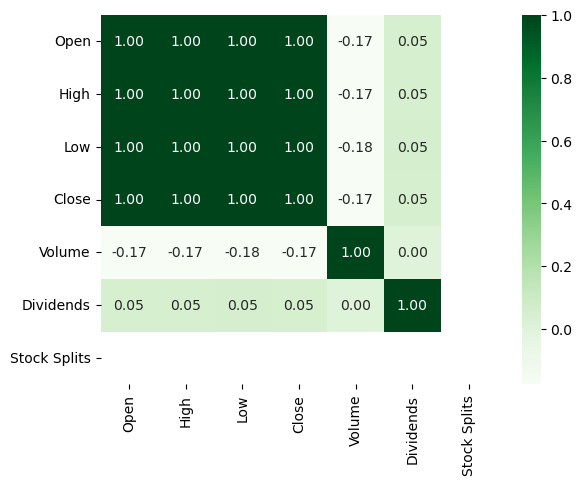

In [9]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

# ****Exploratory Data Analysis

# Time series of stock prices


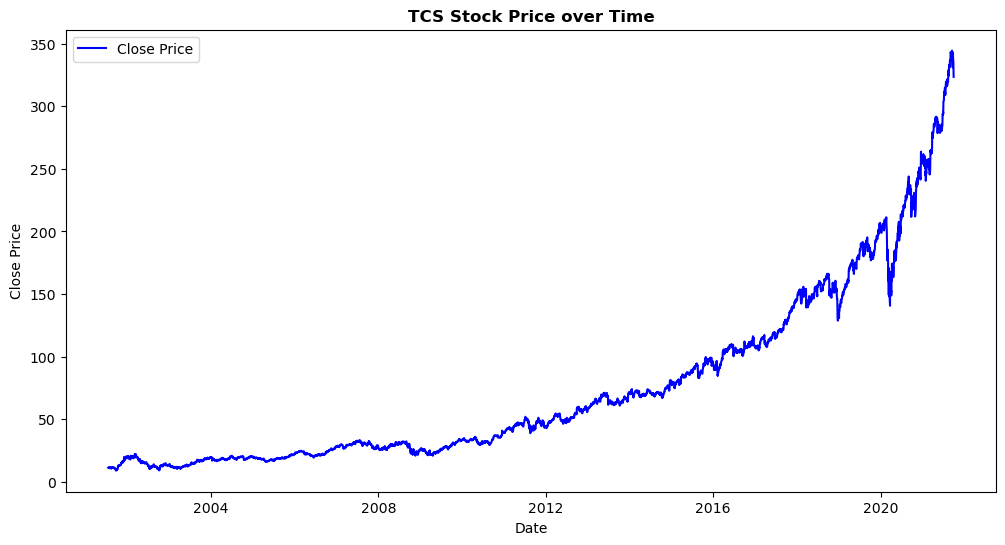

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

# Volume, Dividends, Stock Splits

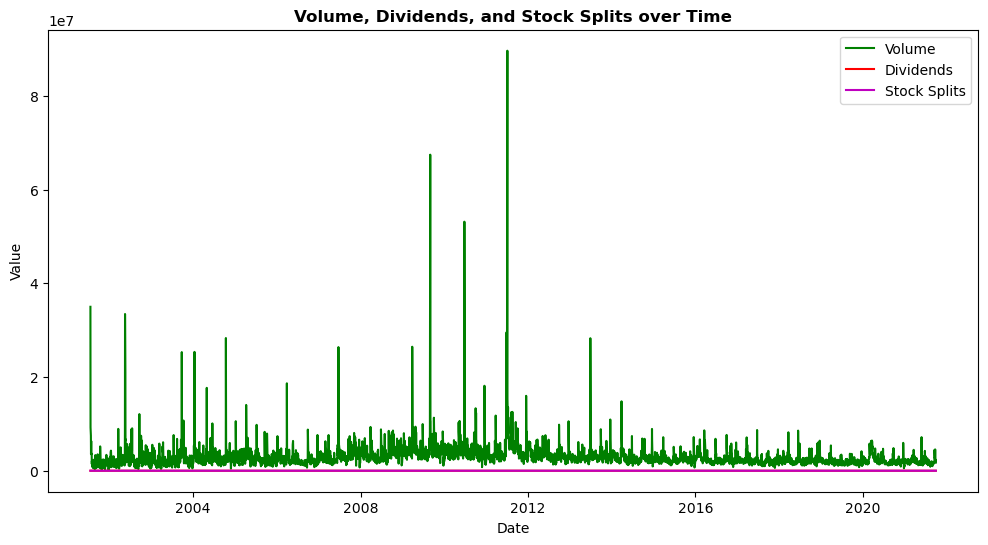

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

# Close vs Volume

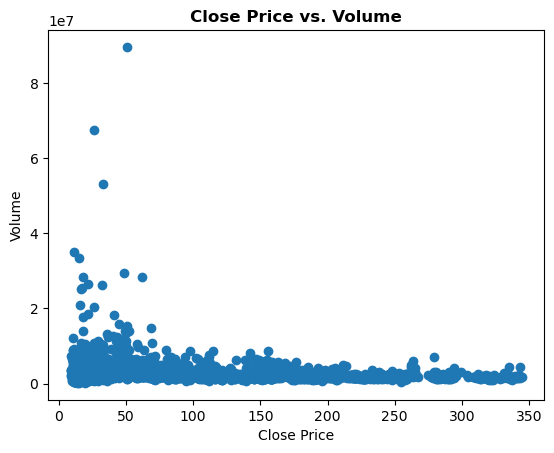

In [12]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()


# Dividends and Stock Splits

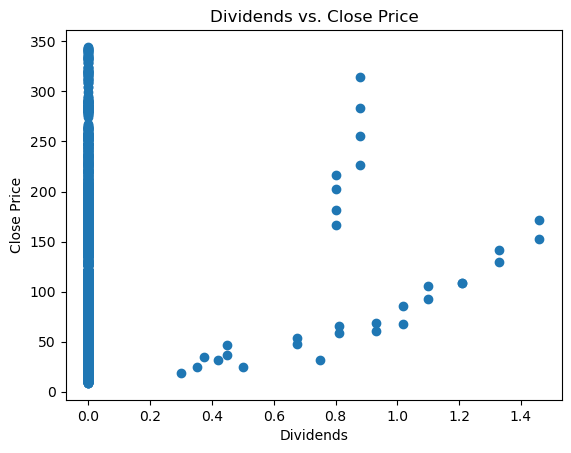

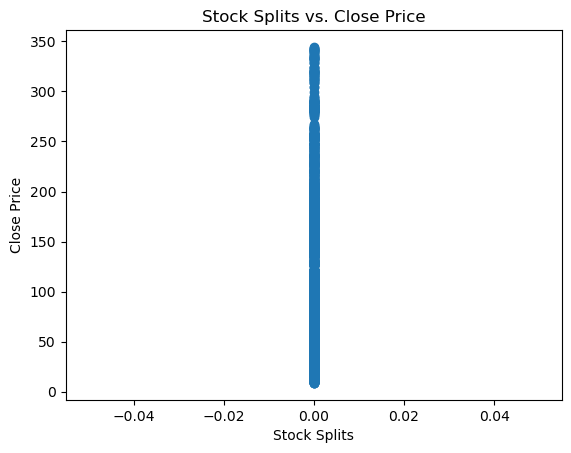

In [13]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()


# Moving Averages

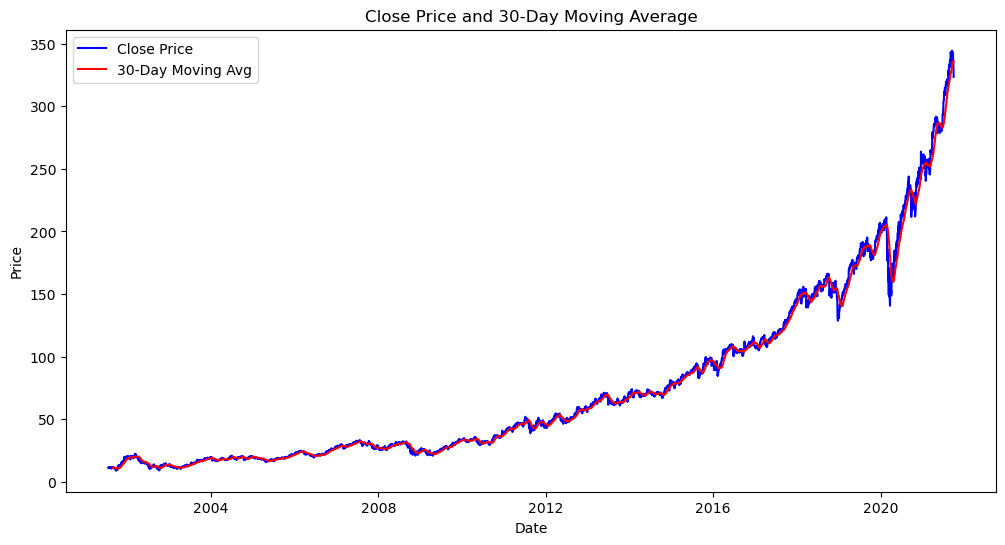

In [14]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()


# Moving Average Crossover Strategy

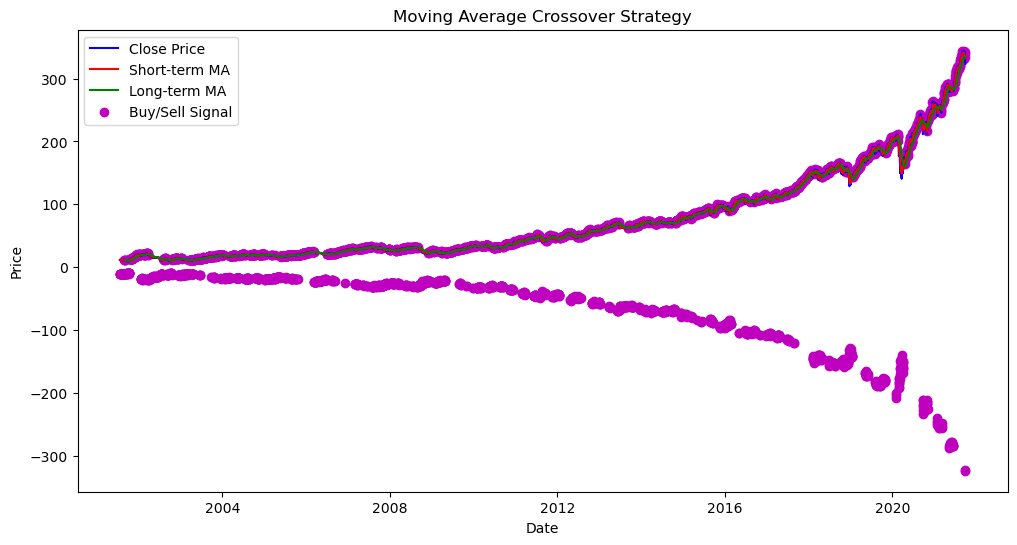

In [15]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()


# Daily Price Change

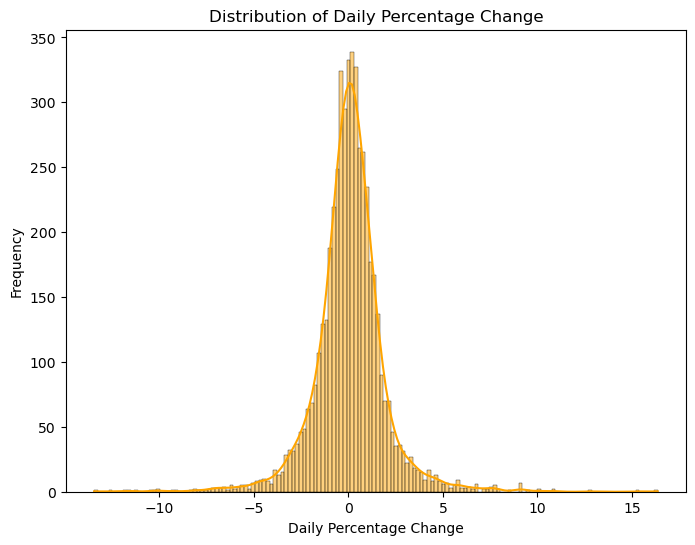

In [16]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()


# ****Feature Engineering

In [17]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

# ****Modelling

In [18]:
df.shape

(5082, 14)

# Data Preparation & Normalization

In [19]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)


# Reshaping Data

In [20]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

# Building a LSTM Model

In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [01:23<00:00,  2.78s/it]


# Predictions using LSTM

In [22]:
lstm_predictions = model.predict(X_test_lstm).flatten()

32/32 [==============================] - 0s 2ms/step


# Inverse transform of the predictions

In [23]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


# Visualization of LSTM predictions

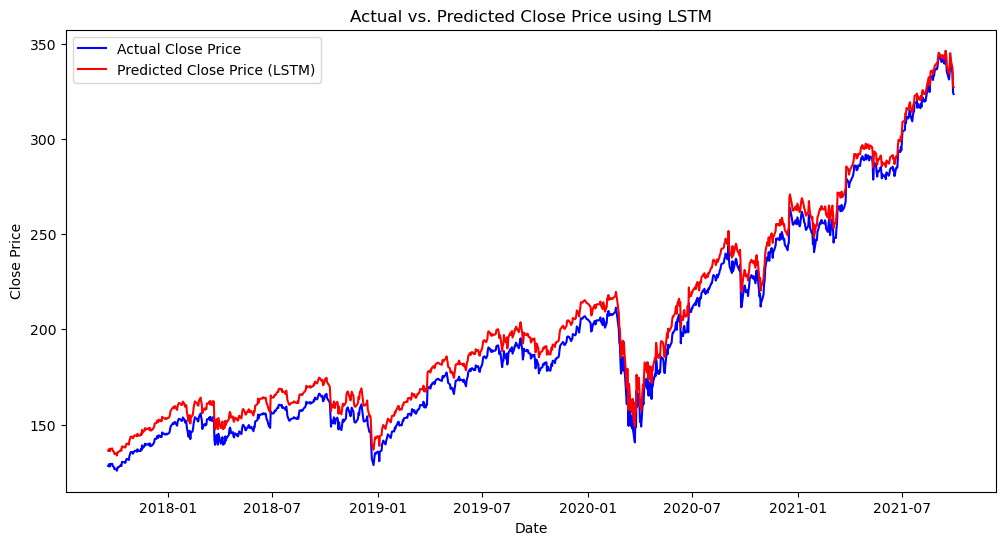

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

# Mean Absolute Error

In [25]:
lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 7.789554092827745


In [26]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]  
predictions_df = pd.DataFrame({'Date': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)
